<font style='font-size:1.5em'>**🧑‍🏫 Week 04 Lecture – (NB01) The building blocks of Pandas** </font>

<font style='font-size:1.2em'>LSE [DS105A](https://lse-dsi.github.io/DS105/autumn-term/index.html){style="color:#e26a4f;font-weight:bold"} – Data for Data Science (2024/25) </font>



<div style="color: #333333; background-color:rgba(226, 106, 79, 0.075); border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); padding: 20px 0 20px 10px; margin: 10px 0 10px 0; flex: 1 1 calc(45% - 20px);min-width: 250px;max-width: 350px;align-items:top;min-height: calc(45% - 20px); box-sizing: border-box;font-size:0.9em;">

🗓️ **DATE:** 24 October 2024

⌚ **TIME:** 16.00-18.00

📍 **LOCATION:** CLM.5.02
</div>


**AUTHORS:**  Dr. [Jon Cardoso-Silva](https://jonjoncardoso.github.io){style="color:#e26a4f;font-weight:bold"}

**DEPARTMENT:** [LSE Data Science Institute](https://lse.ac.uk/dsi){style="color:#e26a4f;font-weight:bold"}

**OBJECTIVE**: Demonstrate the building blocks of the [pandas library](https://pandas.pydata.org){style="color:#e26a4f;font-weight:bold"} and the beautiful things you can do with it

**REFERENCES:**

- 🌐 [10 minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html){style="color:#e26a4f;font-weight:bold"}
- 📖 [Official pandas documentation](https://pandas.pydata.org/docs/reference/index.html){style="color:#e26a4f;font-weight:bold"}

---

In [1]:
import os

import numpy as np
import pandas as pd

# 1. Reading the Data

Expand the text below to understand how I collected the data and did a preliminary pre-processing of it for this lecture.

<details style="border: 1px solid #aaa;border-radius: 4px;padding: .5em .5em 0;width:50%;font-size:0.9em;margin-bottom:1em">
    <summary style="font-weight: bold;margin: -.5em -.5em 0;padding: .5em;">Data Collection</summary>

I wrote a script to:

1. Visit the Waitrose's ['Browse by Category'](https://www.waitrose.com/ecom/shop/browse/groceries) page
2. Click on each unique category
3. Scroll down to the bottom of the page and click 'Load More' until reaching the end of the list
4. Collect basic information about each one of the products (link, name, quantity, size, price)
5. Save collected products of each category to an individual CSV file

I checked [Waitrose's bots.txt file](https://www.waitrose.com/robots.txt) to confirm I had their permission for this.

</details>

<details style="border: 1px solid #aaa;border-radius: 4px;padding: .5em .5em 0;width:50%;font-size:0.9em">
    <summary style="font-weight: bold;margin: -.5em -.5em 0;padding: .5em;">Preliminary Data Pre-processing</summary>

The data was already kind of clean, but we still need to pre-process it for analysis. 

I've made the following changes to the data collected as described above:

- I combined all the CSV files into a single larger CSV
- I transformed the `item-price` column from a string to a float (removing the currency symbol and other characters)
- I remove the ranges from the `product-size` column

<div style="font-size:0.85em;line-height:1.25em;display:block;background-color:#5d9ebc22;padding:0.5em;border-radius:0.5em;margin:1em 0 1em 0;padding:0.75em 0.5em 0.05em 0.75em;width:50%">

I only did the above to make our first lecture about pandas a bit more interesting. I want to show you the cool things you can do with pandas once your data is clean.

🤫 However, since the whole point of this course is to learn how to manipulate (clean & pre-process) data I will give you the unclean data so you can exercise your Python function skills!

</div>

</details>


In [2]:
df = pd.read_csv('../data/waitrose-products-combined-2024-07.csv')
df

,data-product-id,data-product-name,data-product-type,data-product-on-offer,data-product-index,image-url,product-page,product-name,product-size,item-price,price-per-unit,offer-description,category
0,525635,Organix Raspberry & Apple Soft Oaty Bars,G,False,1.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/organix...,Organix Raspberry & Apple Soft Oaty Bars,6x23g,3.15,£2.29/100g,NaN,"Baby, Child & Parent"
1,557746,Organix Carrot Cake Oaty Bars,G,False,2.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/organix...,Organix Carrot Cake Oaty Bars,6x23g,3.15,£2.29/100g,NaN,"Baby, Child & Parent"
2,32062,Aptamil 2 Follow On Milk,G,False,394.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/aptamil...,Aptamil 2 Follow On Milk,800g,13.50,£16.88/kg,NaN,"Baby, Child & Parent"
3,767801,Essential Baby Wipes,G,False,4.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Baby Wipes,80s,0.95,1.2p each,NaN,"Baby, Child & Parent"
4,514054,Organix Apple Rice Cakes,G,False,5.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/organix...,Organix Apple Rice Cakes,40g,1.60,£4/100g,NaN,"Baby, Child & Parent"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25413,18427,Duchy Organic British Lamb Half Leg,G,False,1590.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/duchy-o...,Duchy Organic British Lamb Half Leg,Typical weight 0.94kg,24.31,£26.00/kg,NaN,Waitrose Brands
25414,11606,Cooks' Ingredients Wok Oil,G,False,1591.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/cooks-i...,Cooks' Ingredients Wok Oil,250ml,2.40,96p/100ml,NaN,Waitrose Brands
25415,6903,No. 1 Badoz Vacherin Du Haut-Doubs AOP French ...,G,False,1592.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/no-1-ba...,No. 1 Badoz Vacherin Du Haut-Doubs AOP French ...,350g,10.00,£28.58/kg,NaN,Waitrose Brands
25416,6125,Cooks' Ingredients White Marzipan,G,False,1593.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/cooks-i...,Cooks' Ingredients White Marzipan,500g,2.50,£5/kg,NaN,Waitrose Brands


In [3]:
# Pandas is its own type
type(df)

pandas.core.frame.DataFrame

[💡 Isn't it beautiful to be able to read a CSV file with a single line of code?]{style="display:block;background-color:rgba(200, 144, 32, 0.05);padding:0.5em;font-size:0.85em;margin-left:0em;margin-bottom:1em;border-radius:0.5em;width:50%"}

<details style="border: 1px solid #aaa;border-radius: 4px;padding: .5em .5em 0;width:50%;font-size:0.9em">
    <summary style="font-weight: bold;margin: -.5em -.5em 0;padding: .5em;">How would that look like in just pure Python?</summary>

```python

with open('../data/waitrose-products-2024-07.csv', 'r', encoding='utf-8') as file:
    # I'd have to read the file content as a string first
    data_as_str  = file.read()

# Then, I'd have to split the lines
data_as_list = data_as_str.split('\n')

# I'd have to pre-process the first line to get the column names
column_names = data_as_list[0].split(',')

# I'd have to be careful and remove the first line from the data
data_as_list = data_as_list[1:]

# I'd have to check the last line and remove it if it's empty
if data_as_list[-1] == '':
    data_as_list = data_as_list[:-1]

# I'd have to split each line by the comma
data_as_list = [line.split(',') for line in data_as_list]

# The above would probably throw an error if there were commas in the product name
# I'd have to stop and think about how to fix that

# Eventually, I'd be able to create a dictionary with the data
data = {column: [] for column in column_names}

# Then I'd fill up the dictionary with the data
for line in data_as_list:
    for i, column in enumerate(column_names):
        data[column].append(line[i])



```

# 2. What is in a DataFrame?

At a conceptual level, you can think of a Data Frame as a table in a spreadsheet. 

- It has rows and columns. 
- Each column has a name and each row has an index (that can be anything, not just a number).
- You can do operations on the entire table, on subsets of the table, or on individual rows or columns.

Let's look closer.

## 2.1 Operations on the entire DataFrame

See all DataFrame operations on the 📖 [DataFrame page of the pandas documentation](https://pandas.pydata.org/docs/reference/frame.html){style="color:#e26a4f;font-weight:bold"}. 

[⭐ **Pro-tip:** By the way, if you want to become a pro, you may want to learn how to read official package documentation. It will give you better proficiency than any ChatGPT query in the long run.]{style="display:block;background-color:rgba(200, 144, 32, 0.1);padding:0.5em;font-size:0.85em;margin-left:0em;margin-bottom:1em;border-radius:0.5em;width:55%"}

Let's look at the [`DataFrame.info()` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html). It gives you a summary of the data in the DataFrame.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25418 entries, 0 to 25417
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data-product-id        25418 non-null  int64  
 1   data-product-name      25418 non-null  object 
 2   data-product-type      25418 non-null  object 
 3   data-product-on-offer  25418 non-null  bool   
 4   data-product-index     25408 non-null  float64
 5   image-url              25418 non-null  object 
 6   product-page           25418 non-null  object 
 7   product-name           25407 non-null  object 
 8   product-size           25363 non-null  object 
 9   item-price             25407 non-null  float64
 10  price-per-unit         24976 non-null  object 
 11  offer-description      7201 non-null   object 
 12  category               25418 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(9)
memory usage: 2.4+ MB


I find myself using `df.shape` a lot too:

In [7]:
print(f"There are {df.shape[0]} products in this data frame")

There are 25418 products in this data frame


[💡 Notice we don't do `df.shape()` here. This is because shape is an **attribute**, not a method. To fully understand the distinction, you'd have to study Object-Oriented Programming (a bit out of the scope of this course)]{style="display:block;background-color:rgba(200, 144, 32, 0.05);padding:0.5em;font-size:0.85em;margin-left:0em;margin-bottom:0em;border-radius:0.5em;width:50%"}

If you have numerical data types, then [`DataFrame.describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) can also be very useful:

In [8]:
df.describe()

,data-product-id,data-product-index,item-price
count,25418.000000,25408.000000,25407.000000
mean,536251.868479,1199.865436,5.216279
std,292018.730465,1015.953401,7.404634
min,1023.000000,1.000000,0.100000
25%,412938.000000,370.000000,2.000000
50%,597341.000000,905.000000,3.100000
75%,783957.250000,1764.250000,5.250000
max,999942.000000,4189.000000,299.990000


I can look at the first or the last rows of the DataFrame with the [`DataFrame.head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) or [`DataFrame.tail()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html) methods.

[💡 The default number of rows to show is 5. You can change that by passing a number as an argument to the method.]{style="display:block;background-color:rgba(200, 144, 32, 0.05);padding:0.5em;font-size:0.85em;margin-left:0em;margin-bottom:1em;border-radius:0.5em;width:50%"}

In [9]:
df.head(3) # Swap it for df.tail(3) to see the last 3 rows

,data-product-id,data-product-name,data-product-type,data-product-on-offer,data-product-index,image-url,product-page,product-name,product-size,item-price,price-per-unit,offer-description,category
0,525635,Organix Raspberry & Apple Soft Oaty Bars,G,False,1.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/organix...,Organix Raspberry & Apple Soft Oaty Bars,6x23g,3.15,£2.29/100g,NaN,"Baby, Child & Parent"
1,557746,Organix Carrot Cake Oaty Bars,G,False,2.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/organix...,Organix Carrot Cake Oaty Bars,6x23g,3.15,£2.29/100g,NaN,"Baby, Child & Parent"
2,32062,Aptamil 2 Follow On Milk,G,False,394.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/aptamil...,Aptamil 2 Follow On Milk,800g,13.50,£16.88/kg,NaN,"Baby, Child & Parent"


What you just care about the name of the columns? Use `DataFrame.columns`:

In [10]:
df.columns

Index(['data-product-id', 'data-product-name', 'data-product-type',
       'data-product-on-offer', 'data-product-index', 'image-url',
       'product-page', 'product-name', 'product-size', 'item-price',
       'price-per-unit', 'offer-description', 'category'],
      dtype='object')

In [11]:
# Wait what is this?
type(df.columns)

pandas.core.indexes.base.Index

## 2.2 Little detour to highlight the notion of an Index

You can think of an [Index](https://pandas.pydata.org/docs/reference/api/pandas.Index.html) as a powerful list.

You can do the same things you do with a list:

In [12]:
len(df.columns)

13

But you can do much more with it:



In [13]:
df.columns.has_duplicates

False

You can convert it back to a list if you want (not sure why you'd want to do that, but you can):

In [14]:
df.columns.tolist()

['data-product-id',
 'data-product-name',
 'data-product-type',
 'data-product-on-offer',
 'data-product-index',
 'image-url',
 'product-page',
 'product-name',
 'product-size',
 'item-price',
 'price-per-unit',
 'offer-description',
 'category']

## 2.3 Filtering the DataFrame

### Selecting a single column

You can **select columns** by their names:

In [15]:
# What if I just care about the product name?
df['data-product-name']

0                 Organix Raspberry & Apple Soft Oaty Bars
1                            Organix Carrot Cake Oaty Bars
2                                 Aptamil 2 Follow On Milk
3                                     Essential Baby Wipes
4                                 Organix Apple Rice Cakes
                               ...                        
25413                  Duchy Organic British Lamb Half Leg
25414                           Cooks' Ingredients Wok Oil
25415    No. 1 Badoz Vacherin Du Haut-Doubs AOP French ...
25416                    Cooks' Ingredients White Marzipan
25417                Duchy Organic Pinot Grigio Bag in Box
Name: data-product-name, Length: 25418, dtype: object

**Does that way of selecting items of an object look familiar?** 

That's because we also use square brackets when we want to **access** elements in a list or a dictionary.

```python
some_list[0] # We access elements of a list by their index

some_dictionary['key'] # We access elements of a dictionary by their key
```

Another question: why does the output look a bit different when I select a single column?

In [18]:
type(df['data-product-name']) # That's because this is not a DataFrame, but a Series

pandas.core.series.Series

### Selecting multiple columns

If you want to look at a subset of the columns, you can pass a list of column names to the DataFrame:


In [19]:
selected_columns = ['data-product-name', 'product-size', 'item-price']
df[selected_columns]

,data-product-name,product-size,item-price
0,Organix Raspberry & Apple Soft Oaty Bars,6x23g,3.15
1,Organix Carrot Cake Oaty Bars,6x23g,3.15
2,Aptamil 2 Follow On Milk,800g,13.50
3,Essential Baby Wipes,80s,0.95
4,Organix Apple Rice Cakes,40g,1.60
...,...,...,...
25413,Duchy Organic British Lamb Half Leg,Typical weight 0.94kg,24.31
25414,Cooks' Ingredients Wok Oil,250ml,2.40
25415,No. 1 Badoz Vacherin Du Haut-Doubs AOP French ...,350g,10.00
25416,Cooks' Ingredients White Marzipan,500g,2.50


In [16]:
# or simply:
df[['data-product-name', 'product-size', 'item-price']]

,data-product-name,product-size,item-price
0,Organix Raspberry & Apple Soft Oaty Bars,6x23g,3.15
1,Organix Carrot Cake Oaty Bars,6x23g,3.15
2,Aptamil 2 Follow On Milk,800g,13.50
3,Essential Baby Wipes,80s,0.95
4,Organix Apple Rice Cakes,40g,1.60
...,...,...,...
25413,Duchy Organic British Lamb Half Leg,Typical weight 0.94kg,24.31
25414,Cooks' Ingredients Wok Oil,250ml,2.40
25415,No. 1 Badoz Vacherin Du Haut-Doubs AOP French ...,350g,10.00
25416,Cooks' Ingredients White Marzipan,500g,2.50


☝️ When using this syntax, notice that the outermost square brackets represents an **accessor** while the one inside is simply to indicate a list. 

# 3. What is a Series?

Just like you can think of an Index as a powerful list, you can think of a [Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) as a powerful dictionary. It has a name (the column name) and an index (the row index), but it also has a lot of methods and attributes that make it **a lot more powerful than a dictionary**!

See all Series operations on the 📖 [Series page of the pandas documentation](https://pandas.pydata.org/docs/reference/series.html){style="color:#e26a4f;font-weight:bold"}. 

[⭐ **Pro-tip:** By the way, if you want to become a pro, you may want to learn how to read official package documentation. It will give you better proficiency than any ChatGPT query in the long run.]{style="display:block;background-color:rgba(200, 144, 32, 0.1);padding:0.5em;font-size:0.85em;margin-left:0em;margin-bottom:1em;border-radius:0.5em;width:55%"}


### The `dtype` attribute

Check the data type of a Series with the `dtype` attribute:

In [20]:
df['item-price'].dtype

dtype('float64')

### Each Series object has an `index` attribute

Check the index of a Series with the `index` attribute:

In [25]:
df['item-price'].index

RangeIndex(start=0, stop=25418, step=1)

[💡 All columns of a DataFrame share the same index! Confirm that by changing the name of the column above and re-running the cell.]{style="display:block;background-color:rgba(200, 144, 32, 0.05);padding:0.5em;font-size:0.85em;margin-left:0em;margin-bottom:0em;border-radius:0.5em;width:40%"}

### Mathematical operations

You can calculate the mean, median, sum, etc. of a Series that is numerical:

In [30]:
df['item-price'].median()

3.1

## Describe numerical types

If the Series has numerical data, you can use the `Series.describe()` method to get a summary of the data:

In [32]:
df['item-price'].describe()

count    25407.000000
mean         5.216279
std          7.404634
min          0.100000
25%          2.000000
50%          3.100000
75%          5.250000
max        299.990000
Name: item-price, dtype: float64

[💡 The output of a `Series.describe()` method is another Series object! This is the key difference between `Series.describe()` and `DataFrame.describe()`.]{style="display:block;background-color:rgba(200, 144, 32, 0.05);padding:0.5em;font-size:0.85em;margin-left:0em;margin-bottom:0em;border-radius:0.5em;width:50%"}

### Quick dirty plot

**(This is not how we will do plots in this course! But it's good for quick checks)**

To understand how you can customise the plot, you can check the [Series.plot() documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html).

<Axes: ylabel='Frequency'>

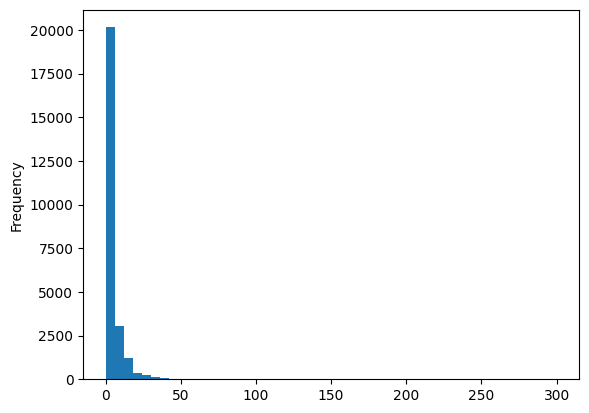

In [33]:
# Take a quick look at the distribution of the prices
df['item-price'].plot(x='index', y='item-price', kind='hist', bins=50)

### Use the `value_counts()` method

This is perhaps one of the most useful methods in pandas. It gives you the frequency of each unique value in the Series:

[💡 The `value_counts()` method is a Series method, not a DataFrame method.]{style="display:block;background-color:rgba(200, 144, 32, 0.05);padding:0.5em;font-size:0.85em;margin-left:0em;margin-bottom:0em;border-radius:0.5em;width:50%"}

In [34]:
# How many times does a product name appear?
df['data-product-name'].value_counts()

data-product-name
Evian Still Mineral Water                           13
Essential Still Natural Mineral Water               12
Essential Sweetcorn                                 11
Cooks' Ingredients Flat Leaf Parsley                11
Essential Limes                                     10
                                                    ..
Colmans Singapore Noodles                            1
McCoy's Thai Sweet Chicken Crisps                    1
Betty Crocker Classic Coffee Icing                   1
Willie's Cacao Sea Salt Caramel Black Pearls         1
Cooks' Ingredients Frozen Stir Fry Vegetable Mix     1
Name: count, Length: 15419, dtype: int64

### Use the `unique()` and `nunique()` methods

Sometimes you want to know how many unique values there are in a Series, or you want to see what those unique values are:

[💡 The `unique()` and `nunique()` methods are Series methods, not DataFrame methods.]{style="display:block;background-color:rgba(200, 144, 32, 0.05);padding:0.5em;font-size:0.85em;margin-left:0em;margin-bottom:0em;border-radius:0.5em;width:50%"}

In [35]:
# How many unique product names are there?
df['data-product-name'].nunique()

15419

In [24]:
# What are the unique product names?
df['data-product-name'].unique()

array(['Organix Raspberry & Apple Soft Oaty Bars',
       'Organix Carrot Cake Oaty Bars', 'Aptamil 2 Follow On Milk', ...,
       "Cooks' Ingredients Frozen Herby Chimichurri Portions",
       "Cooks' Ingredients Artichokes in Oil",
       "Cooks' Ingredients Frozen Stir Fry Vegetable Mix"], dtype=object)

### Use string operations on a Series

When working with strings, you can use the `str` accessor to apply string methods to the entire Series.

[⭐ **Pro-tip:** This means you don't need to write a `for` loop to go through every single string in the Series. You do it all at once!]{style="display:block;background-color:rgba(200, 144, 32, 0.1);padding:0.5em;font-size:0.85em;margin-left:0em;margin-bottom:1em;border-radius:0.5em;width:55%"}

Take a look at all the things you can do with the `str` accessor in the [Series String Methods documentation](https://pandas.pydata.org/docs/reference/series.html#string-handling){style="color:#e26a4f;font-weight:bold"}.

In [25]:
# Make everything upper case for an screaming effect
df['data-product-name'].str.upper()

0                 ORGANIX RASPBERRY & APPLE SOFT OATY BARS
1                            ORGANIX CARROT CAKE OATY BARS
2                                 APTAMIL 2 FOLLOW ON MILK
3                                     ESSENTIAL BABY WIPES
4                                 ORGANIX APPLE RICE CAKES
                               ...                        
25413                  DUCHY ORGANIC BRITISH LAMB HALF LEG
25414                           COOKS' INGREDIENTS WOK OIL
25415    NO. 1 BADOZ VACHERIN DU HAUT-DOUBS AOP FRENCH ...
25416                    COOKS' INGREDIENTS WHITE MARZIPAN
25417                DUCHY ORGANIC PINOT GRIGIO BAG IN BOX
Name: data-product-name, Length: 25418, dtype: object

**Remember the split() method we used before?**

If I have the need to split the names of products into individual words, I can do it with the `str.split()` method:

In [26]:
df['data-product-name'].str.split(" ")

0         [Organix, Raspberry, &, Apple, Soft, Oaty, Bars]
1                      [Organix, Carrot, Cake, Oaty, Bars]
2                           [Aptamil, 2, Follow, On, Milk]
3                                 [Essential, Baby, Wipes]
4                            [Organix, Apple, Rice, Cakes]
                               ...                        
25413           [Duchy, Organic, British, Lamb, Half, Leg]
25414                      [Cooks', Ingredients, Wok, Oil]
25415    [No., 1, Badoz, Vacherin, Du, Haut-Doubs, AOP,...
25416               [Cooks', Ingredients, White, Marzipan]
25417        [Duchy, Organic, Pinot, Grigio, Bag, in, Box]
Name: data-product-name, Length: 25418, dtype: object

☝️ This renders a pandas Series that is made out of lists. There is no dtype list in pandas, so the dtype of the Series is `object`.

# 4. Creating our own operations


## 4.1 Column-wise operations with the `Series.apply()` method

Say you want to produce a modified version of a column. 

You don't want to change the original column, you just want to use it to create a new one.

In [36]:
df['item-price'].head()

0     3.15
1     3.15
2    13.50
3     0.95
4     1.60
Name: item-price, dtype: float64

In [42]:
def make_currency(value: float):
    return f"£ {value:.2f}"

# Apply a function to EVERY SINGLE ELEMENT of a column
df['item-price'].apply(make_currency)

0         £ 3.15
1         £ 3.15
2        £ 13.50
3         £ 0.95
4         £ 1.60
          ...   
25413    £ 24.31
25414     £ 2.40
25415    £ 10.00
25416     £ 2.50
25417    £ 21.49
Name: item-price, Length: 25418, dtype: object

For operations this small, we don't want to write a full named function.

We can use a lambda function for this:

In [28]:
df['item-price'].apply(lambda price_as_float: f"£ {price_as_float:.2f}")

0         £ 3.15
1         £ 3.15
2        £ 13.50
3         £ 0.95
4         £ 1.60
          ...   
25413    £ 24.31
25414     £ 2.40
25415    £ 10.00
25416     £ 2.50
25417    £ 21.49
Name: item-price, Length: 25418, dtype: object

[⭐ **Pro-tip:** a lambda function works the same way as a regular function, it just doesn't have a name!]{style="display:block;background-color:rgba(200, 144, 32, 0.1);padding:0.5em;font-size:0.85em;margin-left:0em;margin-bottom:0em;border-radius:0.5em;width:55%"}

## 4.2 Add new columns to the DataFrame

There are many ways to add new columns to a DataFrame:


```python
# Method 1: directly assign a value to a new column with the square bracket notation
df['new-column'] = df['column-1'].apply(some_function)
```

```python
# Method 2: use the DataFrame.assign() method
df = df.assign(new_column = df['column-1'] + df['column-2'])
```

Eventually, I'd love for you to use the `assign()` method, but for now, I'll show you the first method because it's simpler.

In [29]:
df['price-label'] = df['item-price'].apply(lambda price_as_float: f"£ {price_as_float:.2f}")

In [30]:
df.columns

Index(['data-product-id', 'data-product-name', 'data-product-type',
       'data-product-on-offer', 'data-product-index', 'image-url',
       'product-page', 'product-name', 'product-size', 'item-price',
       'price-per-unit', 'offer-description', 'category', 'price-label'],
      dtype='object')

In [31]:
df[['data-product-name', 'product-size', 'item-price', 'price-label']].head(10)

,data-product-name,product-size,item-price,price-label
0,Organix Raspberry & Apple Soft Oaty Bars,6x23g,3.15,£ 3.15
1,Organix Carrot Cake Oaty Bars,6x23g,3.15,£ 3.15
2,Aptamil 2 Follow On Milk,800g,13.50,£ 13.50
3,Essential Baby Wipes,80s,0.95,£ 0.95
4,Organix Apple Rice Cakes,40g,1.60,£ 1.60
5,Pampers Baby Wipes,52s,1.50,£ 1.50
6,Kendamil First Infant Milk Ready To Feed,250ml,1.20,£ 1.20
7,Ella's Kitchen Puree Prunes,70g,1.00,£ 1.00
8,Waterwipes Biodegradable,60s,2.50,£ 2.50
9,Waitrose Mini Nappy Sacks,75s,1.00,£ 1.00


## 4.3 Row-wise operations with the `DataFrame.apply()` method

Say we want to create, **for each product** (each row), a short description that includes the product name, size, and price.

We can use the [`DataFrame.apply()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) method to apply a function to each row of the DataFrame. In this case, you must specify the `axis=1` argument to indicate that the function should be applied to each row, not columns (the default):

In [32]:
df.apply(lambda x: f'{x["data-product-name"]} ({x["product-size"]}) (£ {x["item-price"]:.2f})', axis=1)

0        Organix Raspberry & Apple Soft Oaty Bars (6x23...
1           Organix Carrot Cake Oaty Bars (6x23g) (£ 3.15)
2                Aptamil 2 Follow On Milk (800g) (£ 13.50)
3                      Essential Baby Wipes (80s) (£ 0.95)
4                  Organix Apple Rice Cakes (40g) (£ 1.60)
                               ...                        
25413    Duchy Organic British Lamb Half Leg (Typical w...
25414          Cooks' Ingredients Wok Oil (250ml) (£ 2.40)
25415    No. 1 Badoz Vacherin Du Haut-Doubs AOP French ...
25416    Cooks' Ingredients White Marzipan (500g) (£ 2.50)
25417    Duchy Organic Pinot Grigio Bag in Box (2.25L) ...
Length: 25418, dtype: object

[💭 **Think about it:** why did the pandas developers decided to make it so the output of `DataFrame.apply()` is a Series and not another DataFrame?]{style="display:block;background-color:rgba(93, 158, 188, 0.1);padding:0.5em;font-size:0.85em;margin-left:0em;margin-bottom:1em;border-radius:0.5em;"}


# 5. Saving the DataFrame

Say you've written a lot of code to make changes to the DataFrame and you do not want to re-run the same code every time you open your notebook. 

You can just save the DataFrame to one of the many file formats pandas supports:

```python
# CSV is the most natural format for tabular data
df.to_csv(some_location, index=False)

# You can also save to an Excel file. You might need to install the openpyxl package first
df.to_excel(some_location, index=False)

# You can also save it to a JSON file
df.to_json(some_location, orient='records')
```

[💡 The `index=False` argument is there to avoid saving the index as a column in the CSV file.]{style="display:block;background-color:rgba(200, 144, 32, 0.05);padding:0.5em;font-size:0.85em;margin-left:0em;margin-bottom:1em;border-radius:0.5em;width:70%"}

[💡 The `orient='records'` argument is there to save the JSON file in a format that is easy to read and load back into a DataFrame.]{style="display:block;background-color:rgba(200, 144, 32, 0.05);padding:0.5em;font-size:0.85em;margin-left:0em;margin-bottom:1em;border-radius:0.5em;width:70%"}